In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline
sns.set()

In [2]:
df=pd.read_csv("E:\\ineuron\\Diabetes\\Diabetes\\diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


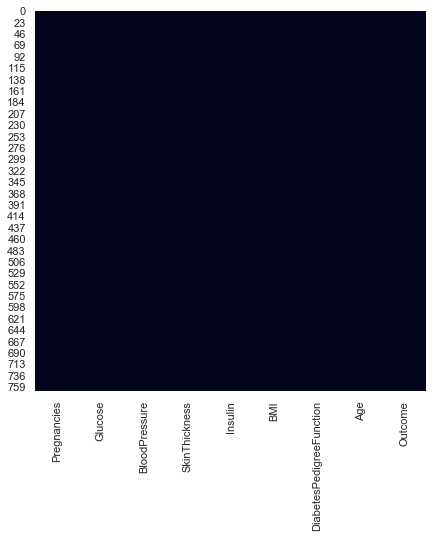

In [4]:
plt.figure(figsize=(7,7))
sns.heatmap(df.isnull(),cbar=False)

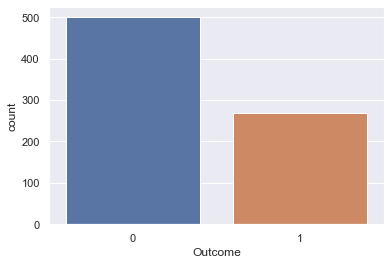

In [5]:
sns.countplot(x=df["Outcome"])

###### this shows that the target value is unbalanced , the non diabetic value is almost twice the diabetic

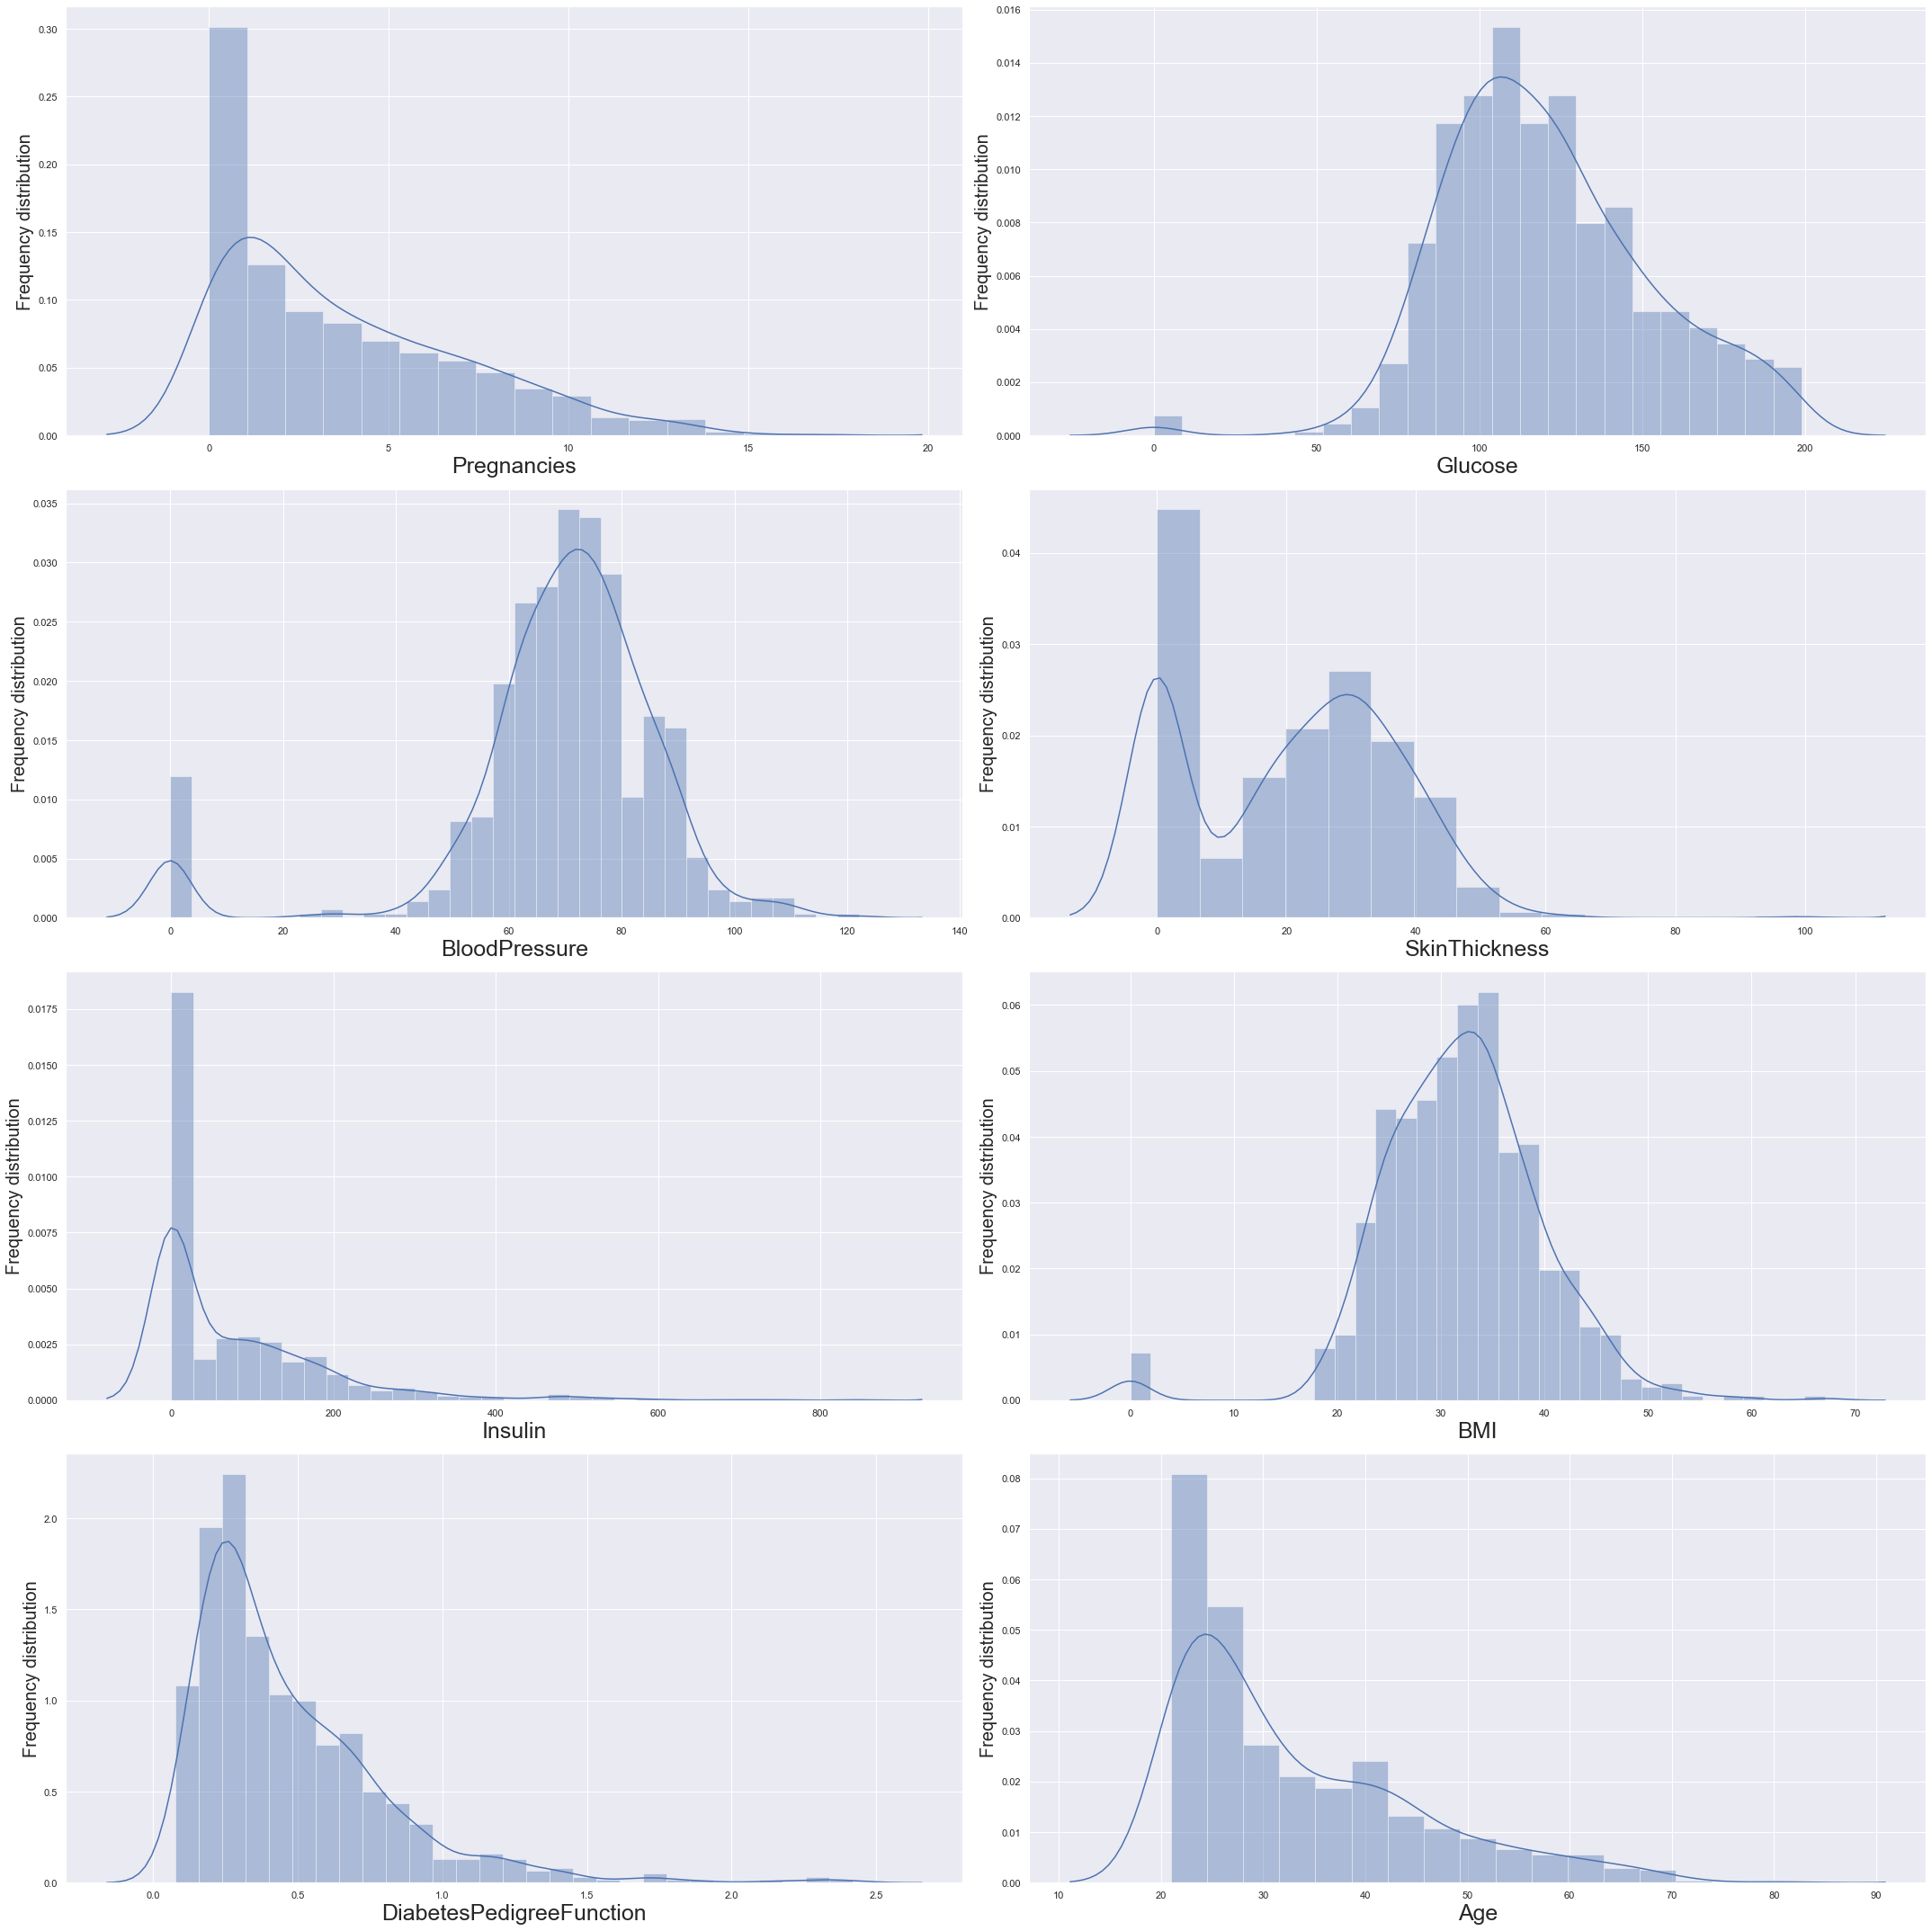

In [14]:
#checking the distribution of the data 
plt.figure(figsize=(30,30))
plotnumber=1

for i in df.columns:
    if i!="Outcome":
        ax=plt.subplot(4,2,plotnumber)
        plt.xlabel(i,fontsize=25)
        plt.ylabel("Frequency distribution",fontsize=20)
        sns.distplot(df[i])
    plotnumber+=1
plt.tight_layout()

In [12]:
# missing value % per column
print((df[df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction"]]==0].count()/df.shape[0])*100)

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64


###### as we can see that there are zero values for some of the attributes which does not make any sense and therefore show that these are null values . Now these values should be replaced by NaN so that eventually they can be replaced with the appropriate values

###### the above distribution graph also show that the number of zeros in Insulin and Skinthickness is very high and therefore distorting the distribution of the data

In [18]:
#making copy of data
df_copy=df.copy(deep=True)

In [19]:
df_copy[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]=df_copy[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0,np.nan)

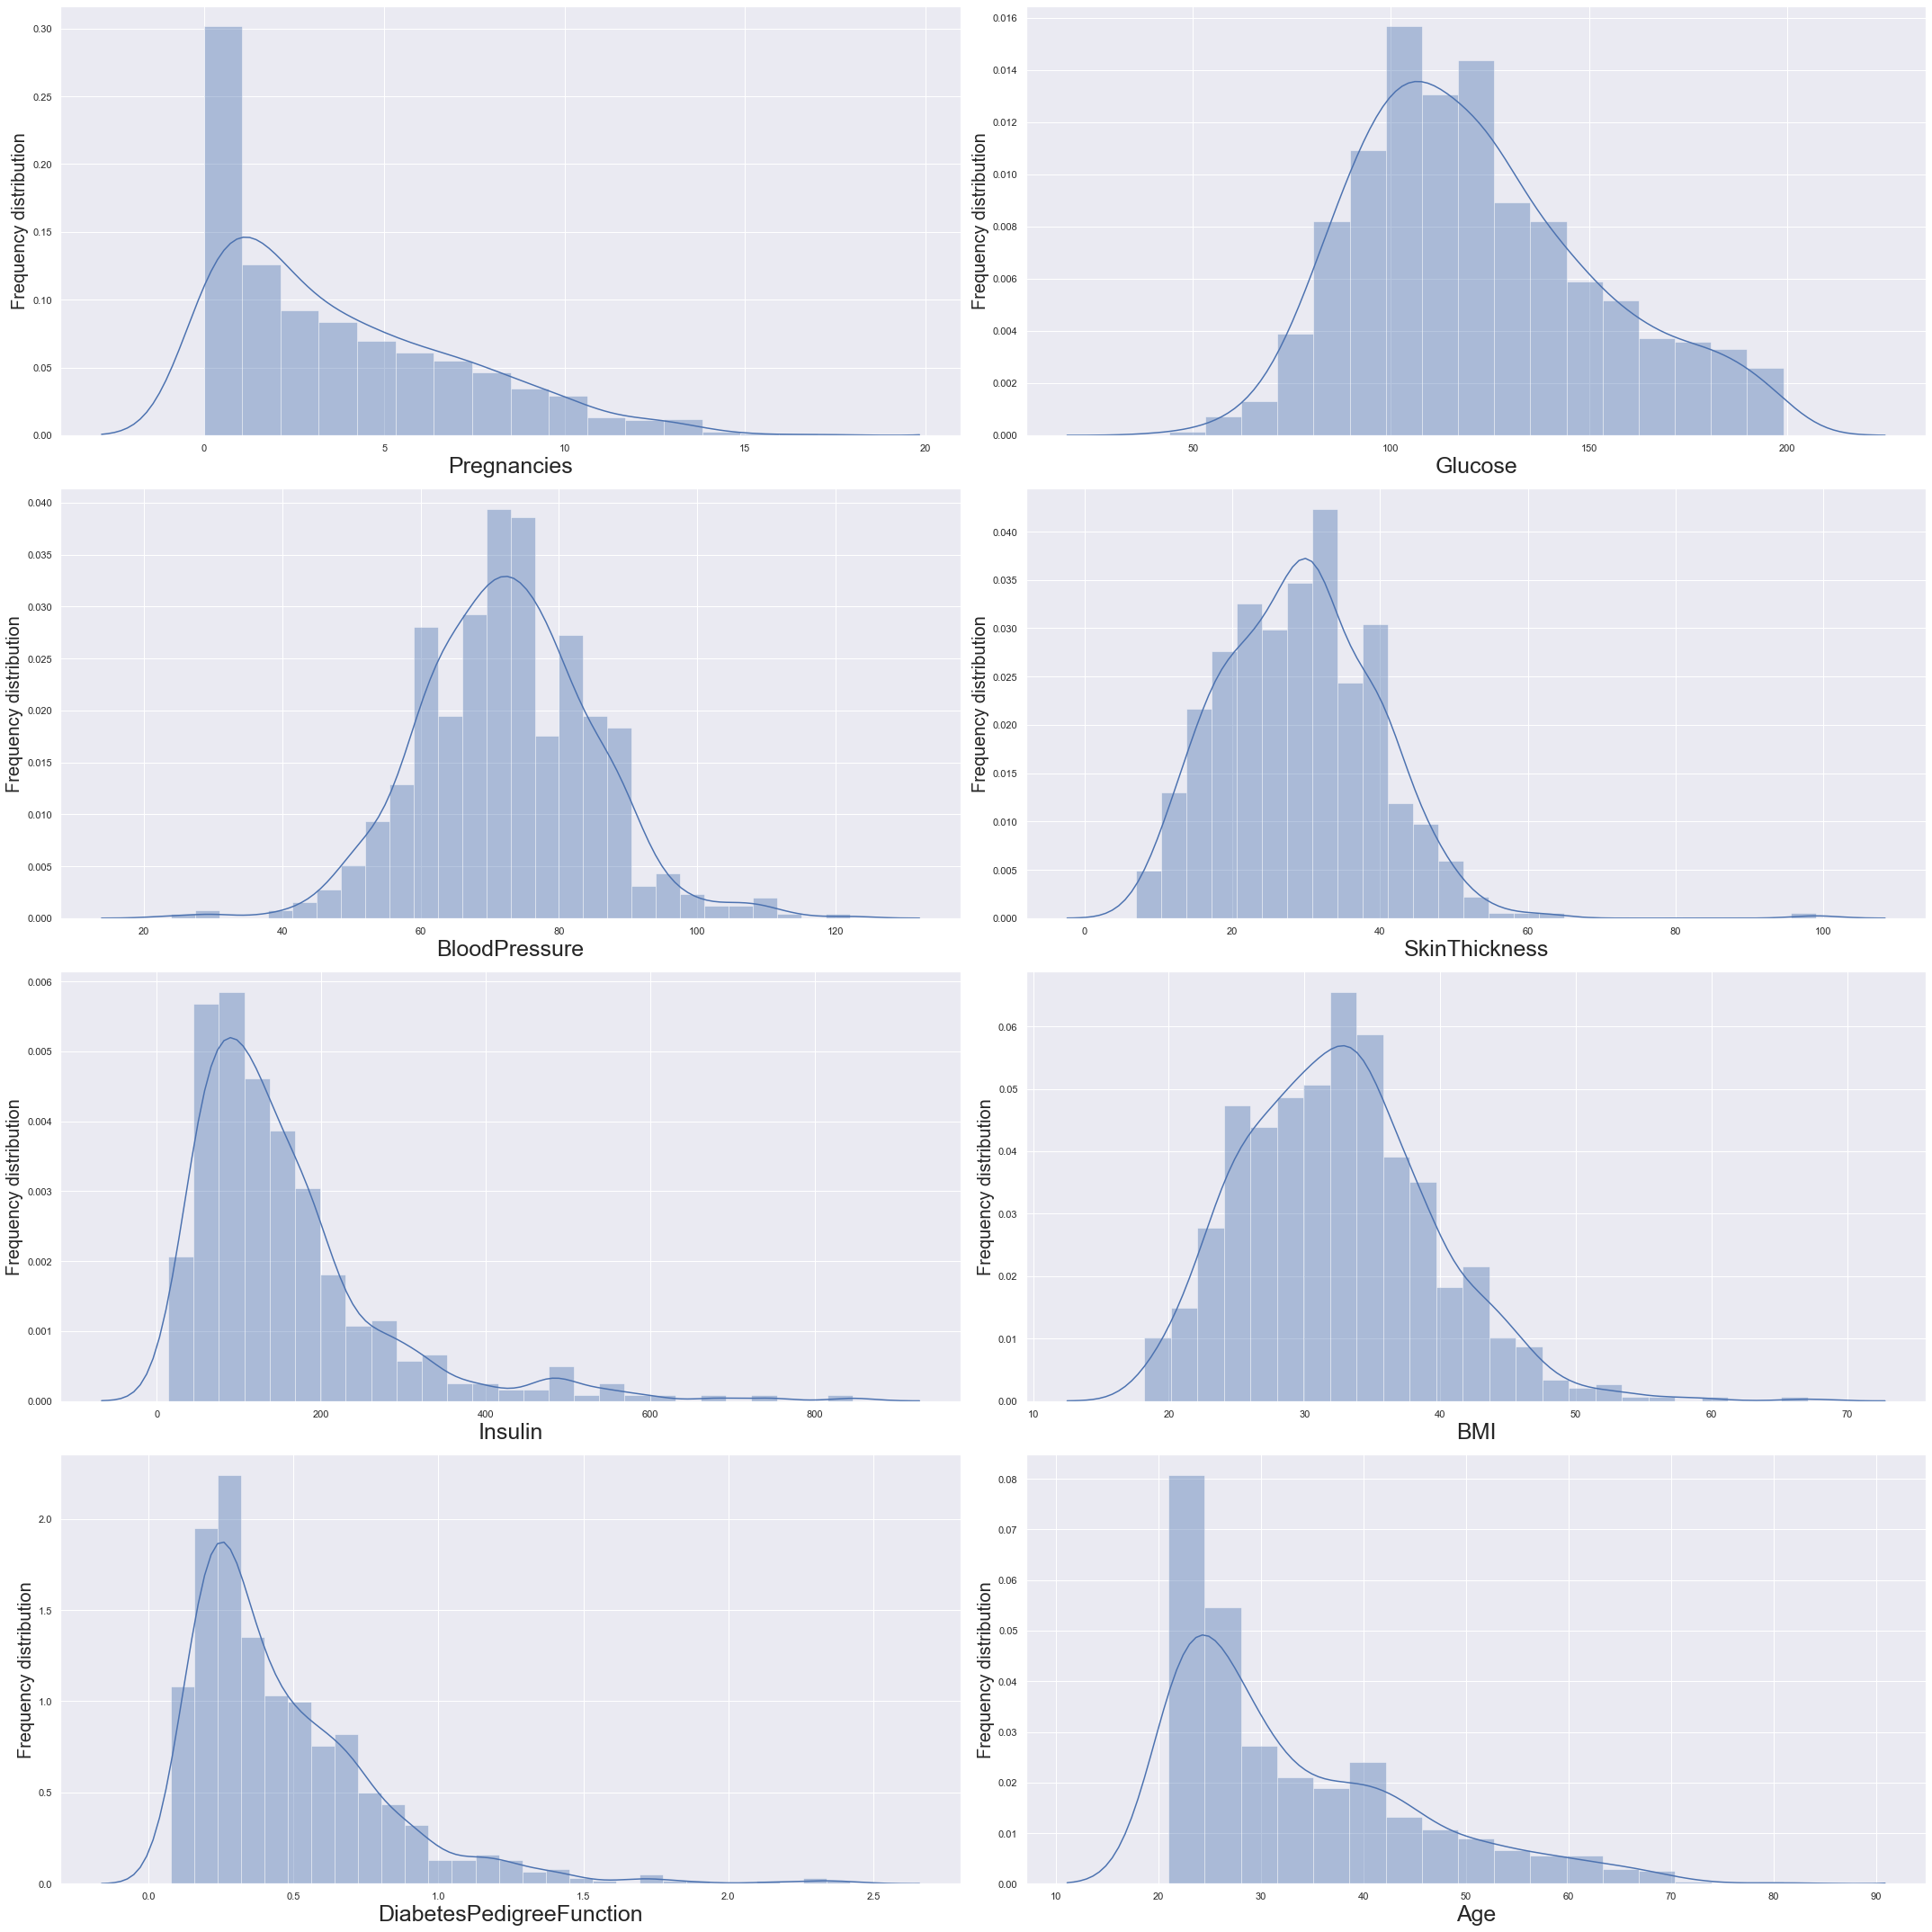

In [23]:
plt.figure(figsize=(30,30))
plotnumber=1

for i in df_copy.columns:
    if i!="Outcome":
        ax=plt.subplot(4,2,plotnumber)
        plt.xlabel(i,fontsize=25)
        plt.ylabel("Frequency distribution",fontsize=20)
        sns.distplot(df_copy[i])
    plotnumber+=1
plt.tight_layout()

In [24]:
df_copy["Glucose"].fillna(df_copy["Glucose"].mean(),inplace=True)

In [25]:
df_copy["BloodPressure"].fillna(df["BloodPressure"].mean(),inplace=True)
df_copy["SkinThickness"].fillna(df["SkinThickness"].mean(),inplace=True)
df_copy["Insulin"].fillna(df["Insulin"].median(),inplace=True)
df_copy["BMI"].fillna(df["BMI"].mean(),inplace=True)

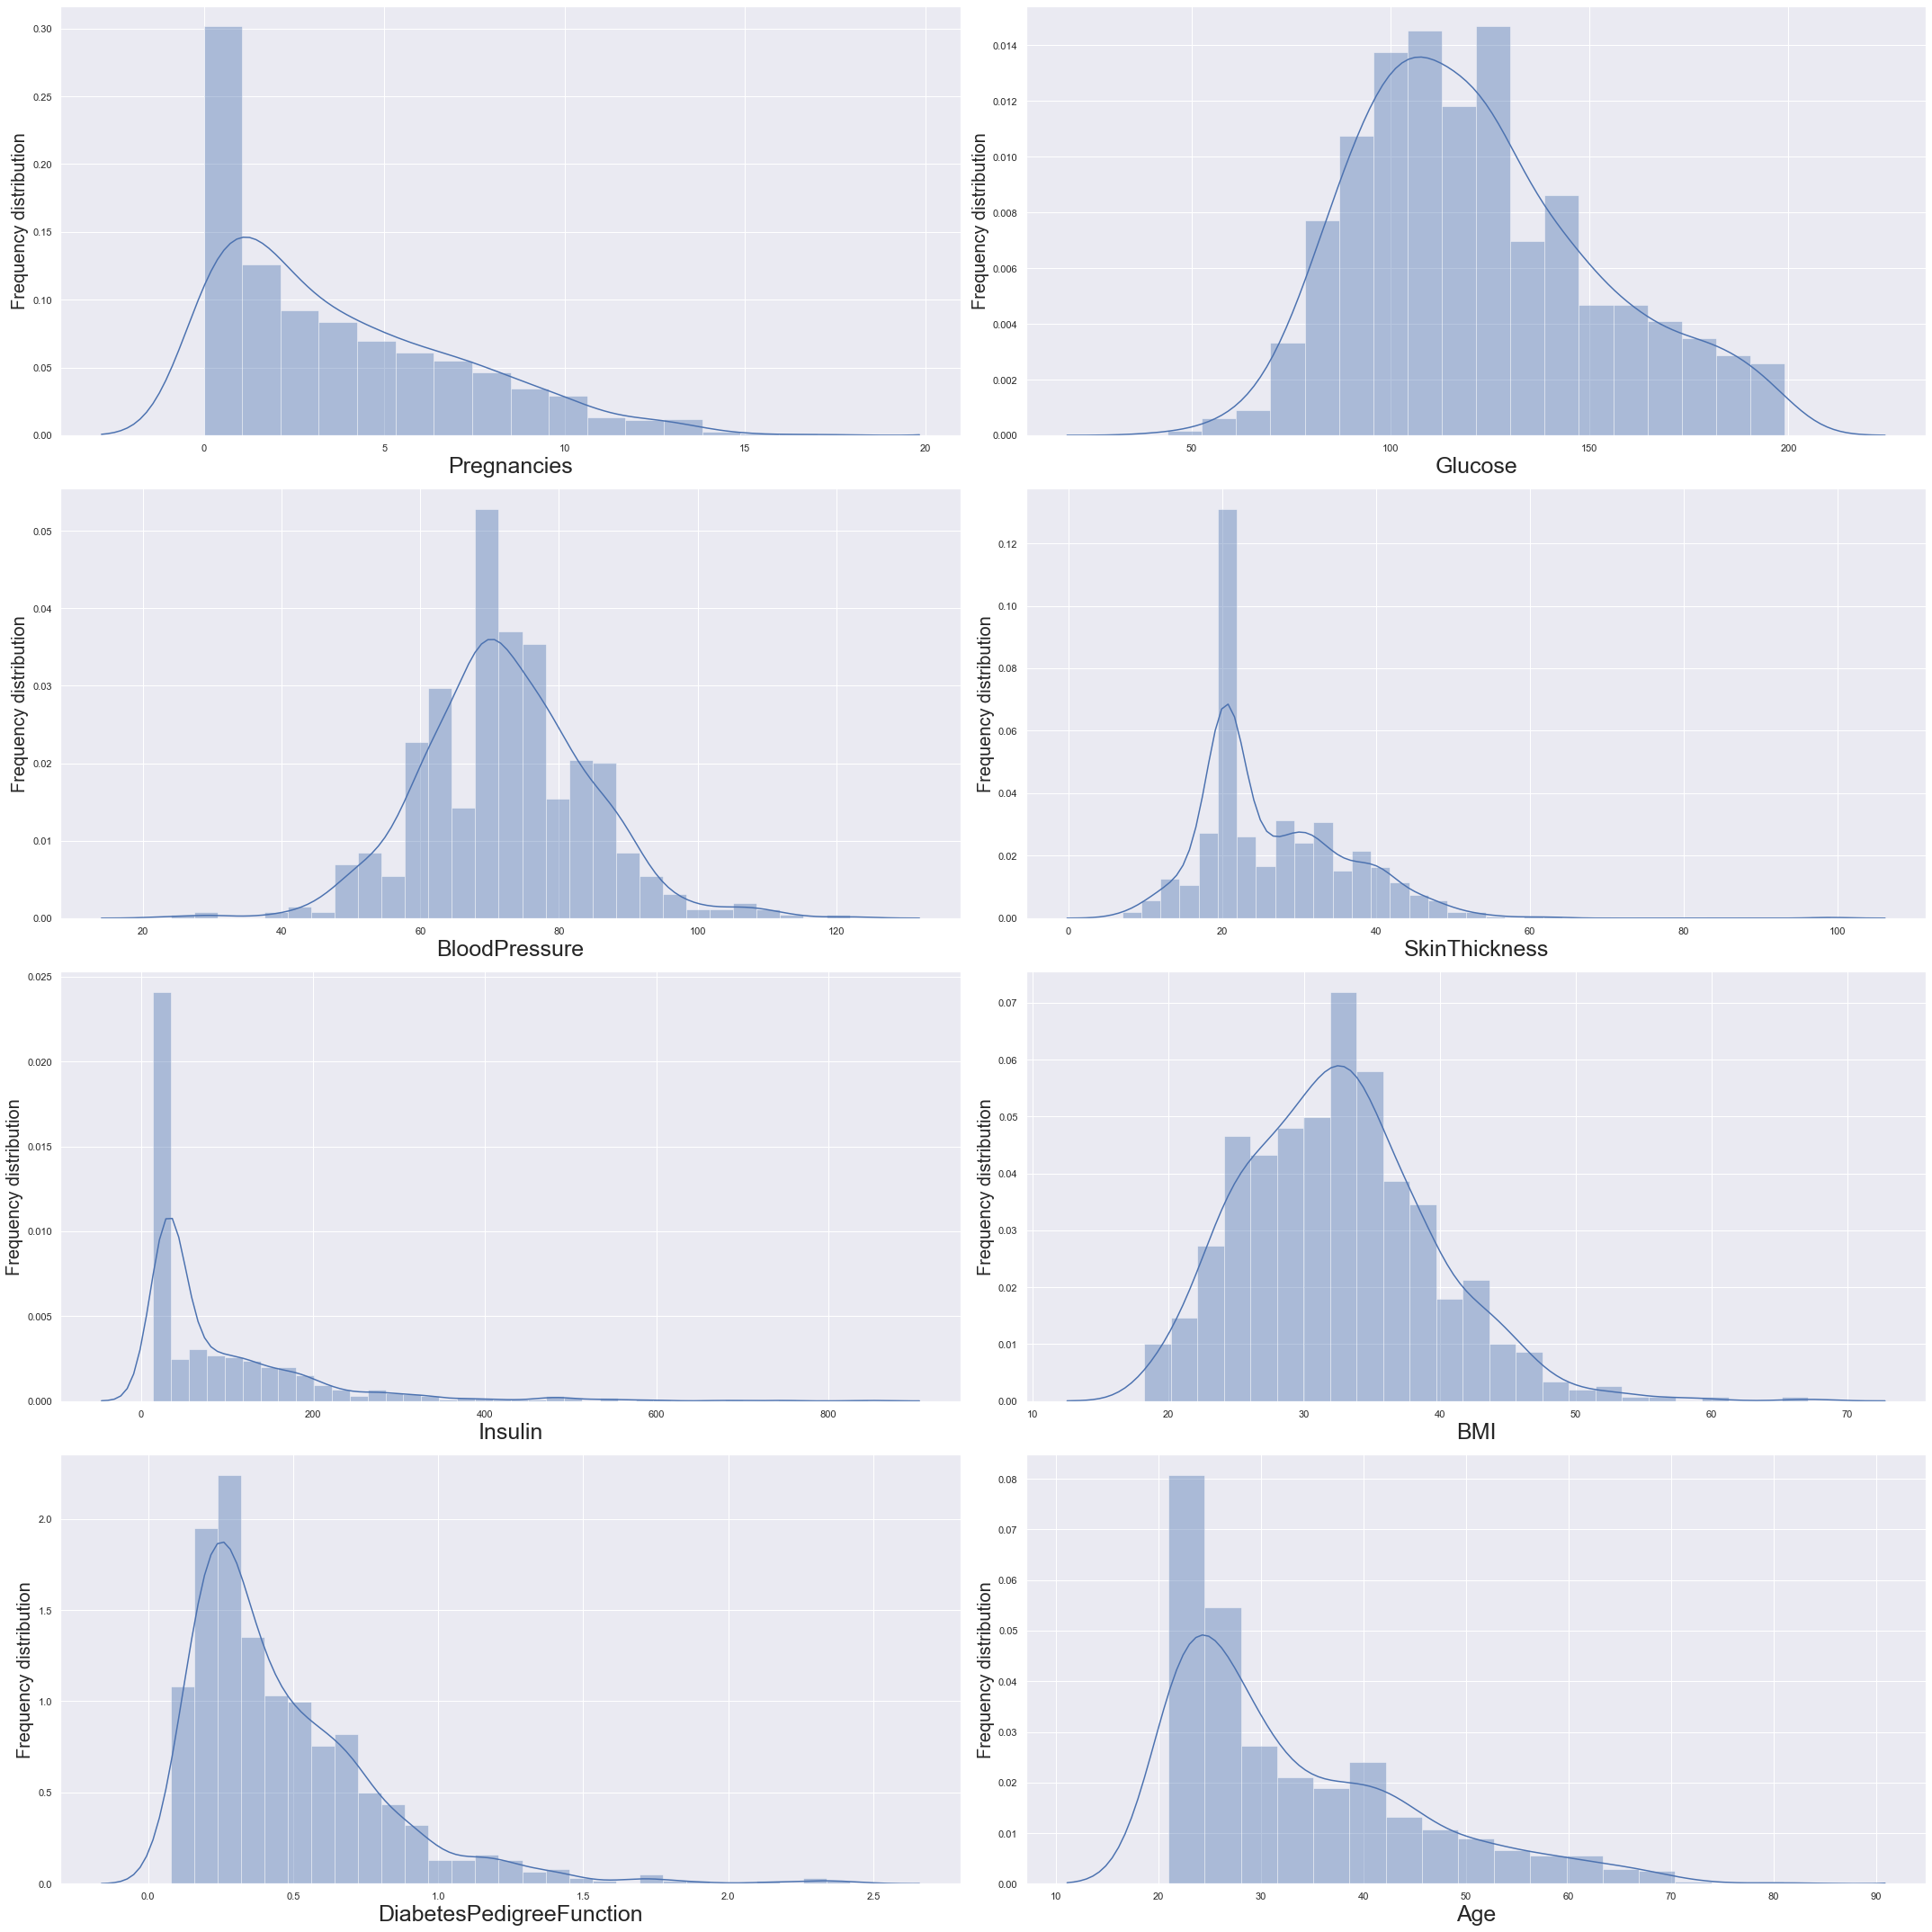

In [26]:
#checkin the distribution of the data after cleaning it
plt.figure(figsize=(30,30))
plotnumber=1

for i in df_copy.columns:
    if i!="Outcome":
        ax=plt.subplot(4,2,plotnumber)
        plt.xlabel(i,fontsize=25)
        plt.ylabel("Frequency distribution",fontsize=20)
        sns.distplot(df_copy[i])
    plotnumber+=1
plt.tight_layout()

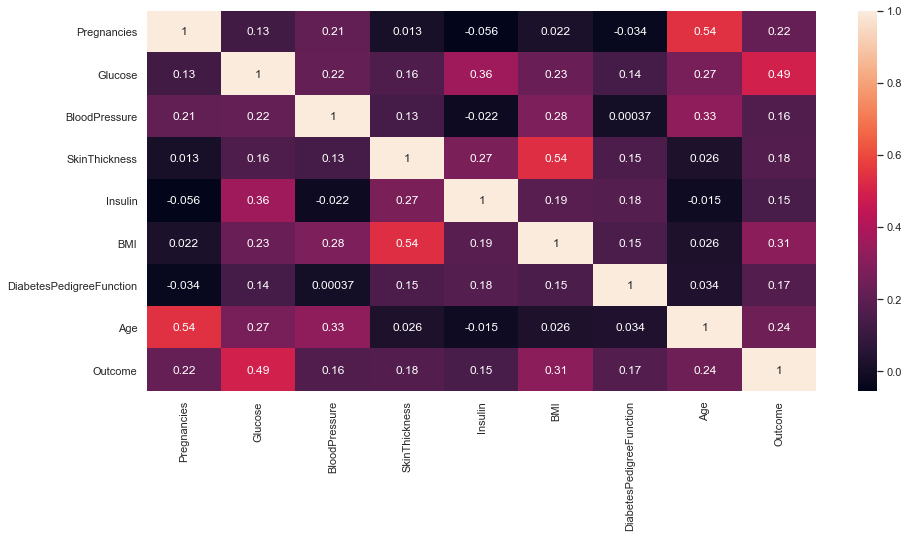

In [30]:
plt.figure(figsize=(15,7))
sns.heatmap(df_copy.corr(),annot=True)

In [32]:
#since the data is very much on a different scale so it is better to standerdise the data
std=StandardScaler()

In [33]:
X=df.iloc[:,:-1]

In [35]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [37]:
X=std.fit_transform(X)

In [41]:
std_X=pd.DataFrame(X,columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI',
                              'DiabetesPedigreeFunction','Age'])

In [43]:
std_X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
